In [1]:
import numpy as np
import pandas as pd

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.0rc0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [3]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [6]:
df_can.drop(['Type', 'Coverage', 'AREA','REG', 'DEV'], inplace=True, axis=1)

In [8]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [10]:
df_can.columns = list(map(str, df_can.columns))

In [13]:
years = list(map(str, range(1980, 2014)))

In [15]:
df_can.set_index('Country', inplace=True)

In [18]:
df_can.index.name = None

In [19]:
df_can['Total'] = df_can.sum(axis= 1)

### Data Visualization

In [21]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

### Line Plot

In [26]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_country = df_can.iloc[0:6, 3:-1]
df_country_t = df_country.transpose()

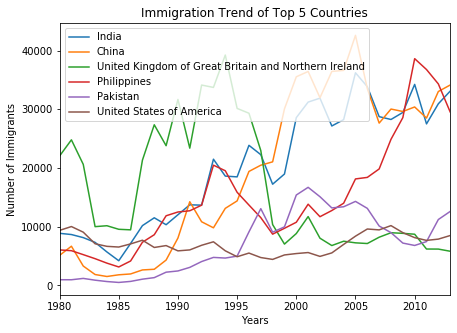

In [34]:
df_country_t.plot(kind='line',figsize=(7,5))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Area Plot

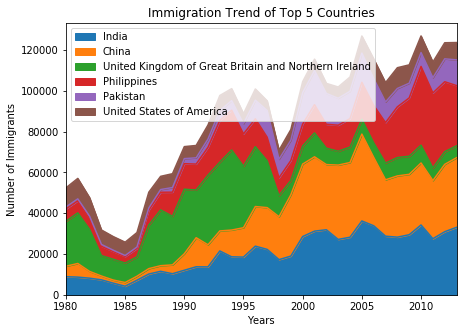

In [35]:
df_country_t.index = df_country_t.index.map(int)
df_country_t.plot(kind='area',figsize=(7,5))
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

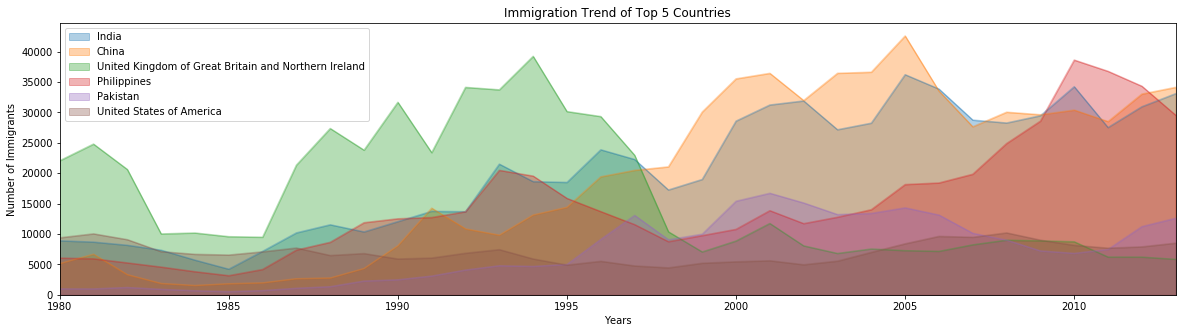

In [44]:
df_country_t.index = df_country_t.index.map(int)
df_country_t.plot(kind='area',
                  figsize=(20,5),
                  stacked= False,
                  alpha = 0.35)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

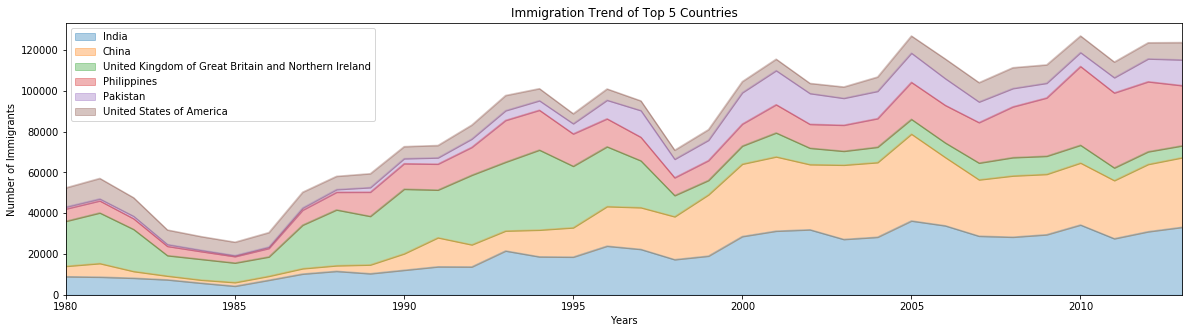

In [45]:
ax = df_country_t.plot(kind='area', alpha=0.35, figsize=(20, 5))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

### Histograms

In [48]:
df_can['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

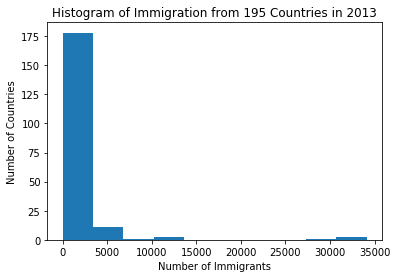

In [51]:
df_can['2013'].plot(kind='hist')
plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants')
plt.show()

#### Matching the x label axis with the bin size

In [52]:
count, bin_edges = np.histogram(df_can['2013'])
bin_edges

array([    0. ,  3412.9,  6825.8, 10238.7, 13651.6, 17064.5, 20477.4,
       23890.3, 27303.2, 30716.1, 34129. ])

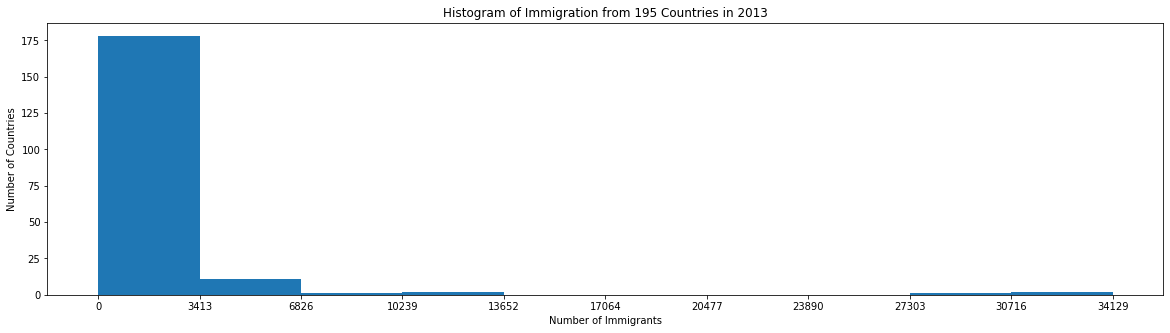

In [53]:
df_can['2013'].plot(kind='hist',
                    figsize=(20,5),
                    xticks= bin_edges)
plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants')
plt.show()

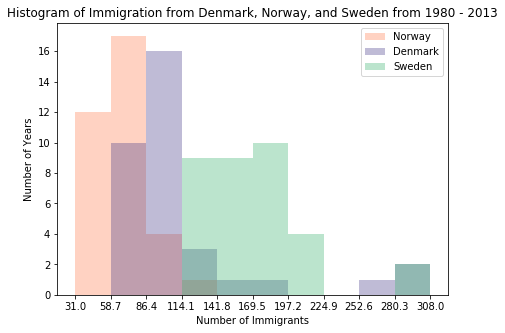

In [64]:
df_can_mt = df_can.loc[['Norway', 'Denmark', 'Sweden'], years].transpose()
count, bin_edges = np.histogram(df_can_mt)

df_can_mt.plot(kind='hist',
               figsize=(7,5),
               xticks= bin_edges,
               alpha= 0.35,
               color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013') 
plt.ylabel('Number of Years') 
plt.xlabel('Number of Immigrants')
plt.show()

### Bar Graph

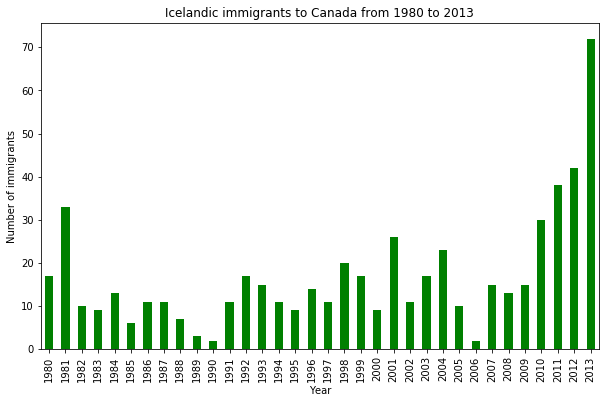

In [78]:
df_iceland = df_can.loc['Iceland', years].transpose()
df_iceland.plot(kind='bar',
                figsize=(10,6),
                color='green', rot=90)
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013') 

plt.show()

### Pie Chart

1. Split the data set by grouping it
2. Apply aggregate funtions like sum, mean, count etc.
3. Combine the data into dataset.

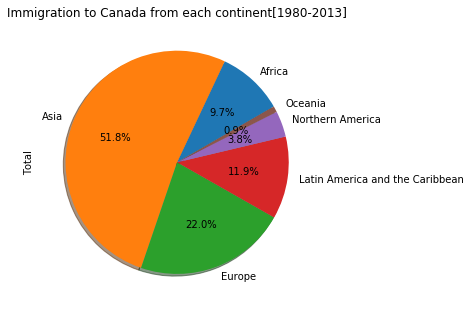

In [103]:
df_cont = df_can.groupby('Continent', axis=0).sum()


df_cont['Total'].plot(kind='pie',
                      figsize=(5,6),
                      autopct='%.1f%%',
                      startangle=30,
                      shadow= True)

plt.title('Immigration to Canada from each continent[1980-2013]')
plt.show()

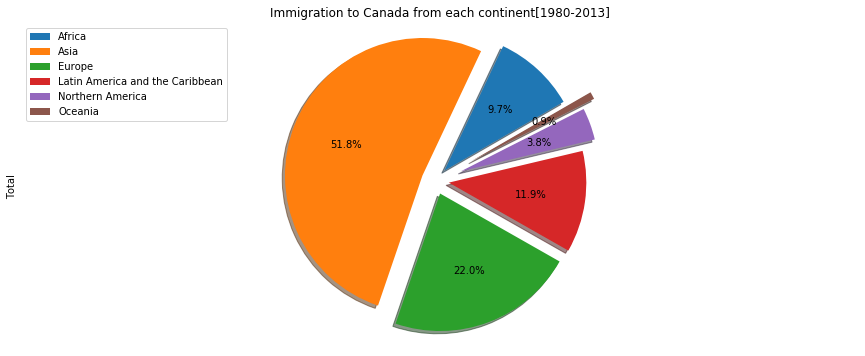

In [115]:
explode_list = [0.1, 0.1, 0.1, 0.1, 0.2, 0.3]
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
df_cont['Total'].plot(kind='pie',
                      figsize=(15,6),
                      autopct='%.1f%%',
                      startangle=30,
                      explode= explode_list,
                      shadow= True,
                      labels = None)

plt.title('Immigration to Canada from each continent[1980-2013]')
plt.axis('equal') 
plt.legend(labels=df_cont.index, loc='upper left')
plt.show()

### Box plots

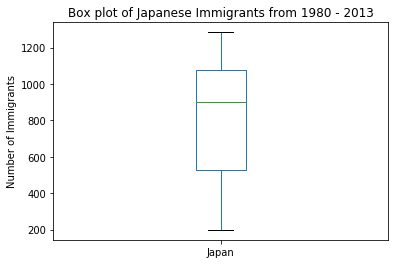

In [124]:
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.plot(kind='box')
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [125]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


## Subplots

Text(0, 0.5, 'Number of Immigrants')

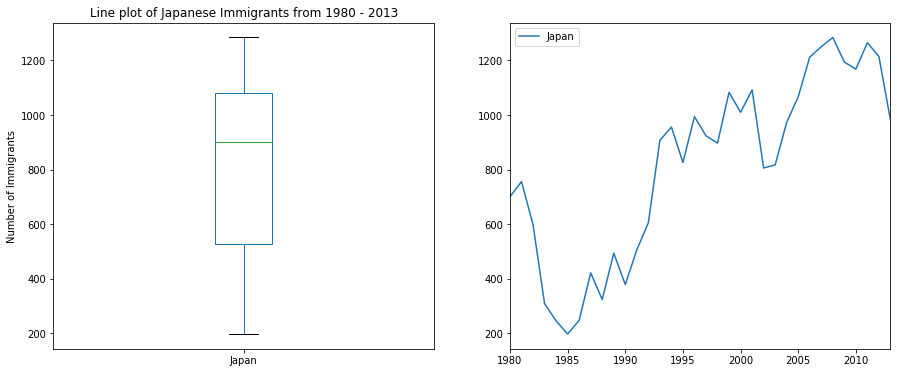

In [134]:
fig = plt.figure()
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

df_japan.plot(kind='box', ax=ax0, figsize = (15,6))
ax0.set_title('Box plot of Japanese Immigrants from 1980 - 2013')
ax0.set_ylabel('Number of Immigrants')

df_japan.plot(kind='line', ax=ax1, figsize = (15,6))
ax0.set_title('Line plot of Japanese Immigrants from 1980 - 2013')
ax0.set_ylabel('Number of Immigrants')

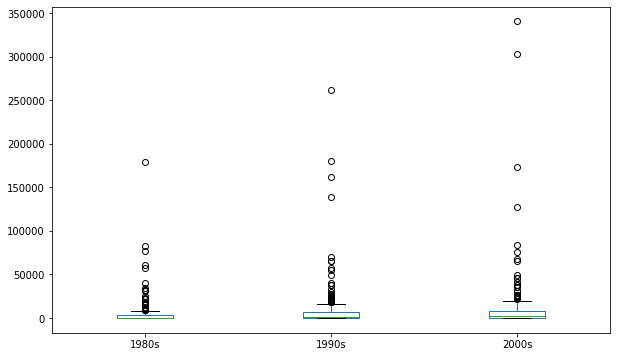

In [135]:
year_80 = list(map(str, range(1980, 1990)))
year_90 = list(map(str, range(1990, 2000)))
year_00 = list(map(str, range(2000, 2010)))

df_80 = df_can.loc[:, year_80].sum(axis=1)
df_90 = df_can.loc[:, year_90].sum(axis=1)
df_00 = df_can.loc[:, year_00].sum(axis=1)

new_df = pd.concat([df_80, df_90, df_00], axis=1)
new_df.index.name = None
new_df.columns = ['1980s', '1990s','2000s']
new_df.head()
new_df.plot(kind='box', figsize=(10,6))

In [136]:
new_df.describe()

,1980s,1990s,2000s
count,195.000000,195.000000,195.000000
mean,5422.938462,10021.492308,12105.538462
std,17099.940917,29129.244091,37447.413889
min,0.000000,0.000000,0.000000
25%,10.000000,196.500000,265.000000
50%,240.000000,1051.000000,1979.000000
75%,3321.500000,6577.500000,8003.000000
max,179171.000000,261966.000000,340385.000000


## Scatterplot

In [154]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace = True)
df_tot.columns = ['Year', 'Total_Immigrants']

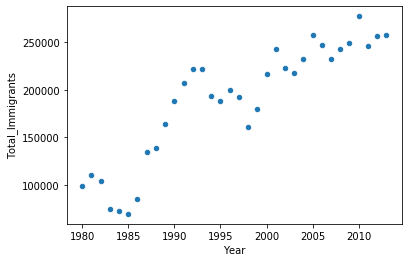

In [156]:
df_tot.plot(kind='scatter', x='Year', y='Total_Immigrants')

In [159]:
import seaborn as sns

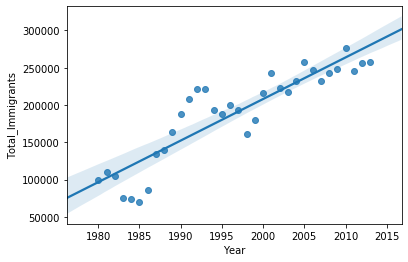

In [160]:
sns.regplot(x='Year', y='Total_Immigrants', data= df_tot)

In [161]:
x = df_tot['Year']      # year on x-axis
y = df_tot['Total_Immigrants']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])